# Try parsing EK80 cal curve in files from Chu

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import echopype as ep

In [2]:
# Check echopype version
print(ep.__version__)

0.5.7.dev3+g185cc1e6


In [3]:
test_folder = Path("../echopype/test_data/ek80_cal_chu")

### WC25 - IMR130-D20211215-T095420.raw

In [4]:
filename = "WC25 - IMR130-D20211215-T095420.raw"
ed_WC25 = ep.open_raw(test_folder / filename, sonar_model="EK80")  # for EK80 file

08:19:26  parsing file WC25 - IMR130-D20211215-T095420.raw, time of first ping: 2021-Dec-15 09:54:20


WBT 747008-15 ES333-7CD_ES
WBT 747015-15 ES70-7CD_ES
WBT 747019-15 ES200-7CD_ES
WBT 747022-15 ES120-7CD_ES


Text(0.5, 1.0, 'WC25 - IMR130-D20211215-T095420.raw')

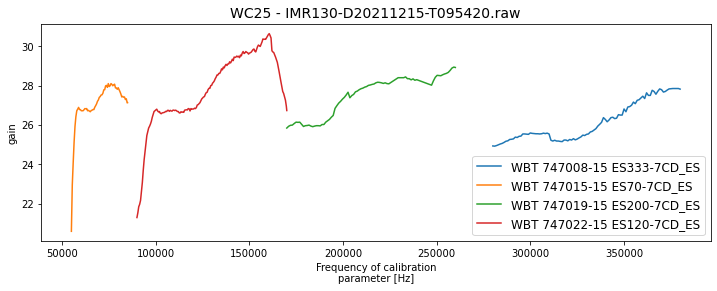

In [5]:
plt.figure(figsize=(12,4))
for ch_id in ed_WC25.vendor.cal_channel_id:
    print(ch_id.values)
    ed_WC25.vendor.gain.sel(cal_channel_id=ch_id).dropna(dim="cal_frequency").plot(label=ch_id.values)
plt.legend(fontsize=12)
plt.title(filename, fontsize=14)

### WC38.1 - BAG EXP IMR 115 WITH NUT BELOW-D20211216-T094359.raw

In [6]:
filename = "WC38.1 - BAG EXP IMR 115 WITH NUT BELOW-D20211216-T094359.raw"
ed_WC38 = ep.open_raw(test_folder / filename, sonar_model="EK80")  # for EK80 file

08:19:29  parsing file WC38.1 - BAG EXP IMR 115 WITH NUT BELOW-D20211216-T094359.raw, time of first ping: 2021-Dec-16 09:43:59


WBT 747008-15 ES333-7CD_ES
WBT 747015-15 ES70-7CD_ES
WBT 747019-15 ES200-7CD_ES
WBT 747022-15 ES120-7CD_ES


Text(0.5, 1.0, 'WC38.1 - BAG EXP IMR 115 WITH NUT BELOW-D20211216-T094359.raw')

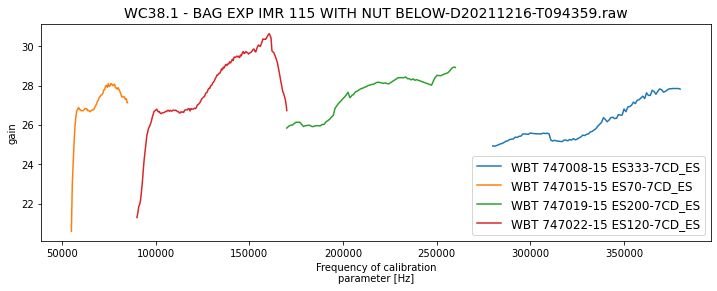

In [7]:
plt.figure(figsize=(12,4))
for ch_id in ed_WC38.vendor.cal_channel_id:
    print(ch_id.values)
    ed_WC38.vendor.gain.sel(cal_channel_id=ch_id).dropna(dim="cal_frequency").plot(label=ch_id.values)
plt.legend(fontsize=12)
plt.title(filename, fontsize=14)

### Compare contain of gain curve

In [8]:
ed_WC25.vendor.cal_channel_id == ed_WC38.vendor.cal_channel_id

<xarray.DataArray 'cal_channel_id' (cal_channel_id: 4)>
array([ True,  True,  True,  True])
Coordinates:
  * cal_channel_id  (cal_channel_id) <U26 'WBT 747008-15 ES333-7CD_ES' ... 'W...

Text(0.5, 1.0, 'WC38.1 - BAG EXP IMR 115 WITH NUT BELOW-D20211216-T094359.raw')

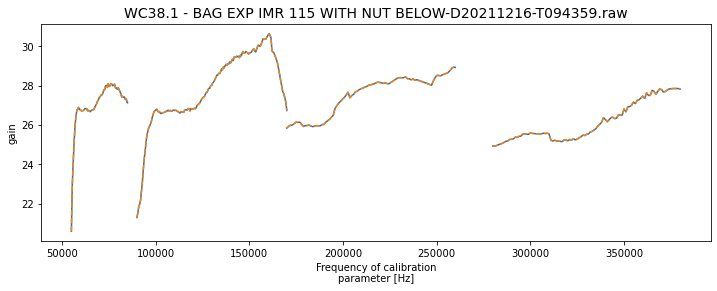

In [9]:
plt.figure(figsize=(12,4))
for ch_id in ed_WC38.vendor.cal_channel_id:
    ed_WC25.vendor.gain.sel(cal_channel_id=ch_id).dropna(dim="cal_frequency").plot(label="WC25", color="C0", ls="-")
    ed_WC38.vendor.gain.sel(cal_channel_id=ch_id).dropna(dim="cal_frequency").plot(label="WC38", color="C1", ls="--")
# plt.legend(fontsize=12)
plt.title(filename, fontsize=14)

### Organize to dataframe and export to CSV

In [10]:
df = pd.DataFrame(index=ed_WC38.vendor.cal_frequency)

In [11]:
for ch_id in ed_WC38.vendor.cal_channel_id:
    df[str(ch_id.values)] = ed_WC38.vendor.gain.sel(cal_channel_id=ch_id).to_series()

In [12]:
df

,WBT 747008-15 ES333-7CD_ES,WBT 747015-15 ES70-7CD_ES,WBT 747019-15 ES200-7CD_ES,WBT 747022-15 ES120-7CD_ES
55000,NaN,20.59,NaN,NaN
55480,NaN,22.95,NaN,NaN
55961,NaN,24.07,NaN,NaN
56441,NaN,25.11,NaN,NaN
56922,NaN,25.92,NaN,NaN
...,...,...,...,...
376096,27.85,NaN,NaN,NaN
377097,27.85,NaN,NaN,NaN
378098,27.85,NaN,NaN,NaN
379099,27.85,NaN,NaN,NaN


In [13]:
df.to_csv(test_folder / "WC38.1_cal_gain.csv")

### WC84 - IMR094_200FM-D20200421-T121842.raw

In [14]:
filename = "WC84 - IMR094_200FM-D20200421-T121842.raw"
ed_WC84 = ep.open_raw(test_folder / filename, sonar_model="EK80")  # for EK80 file

08:19:32  parsing file WC84 - IMR094_200FM-D20200421-T121842.raw, time of first ping: 2020-Apr-21 12:18:42


In [15]:
ed_WC84.vendor

<xarray.Dataset>
Dimensions:           (frequency: 4, pulse_length_bin: 5)
Coordinates:
  * frequency         (frequency) float64 7e+04 1.2e+05 2e+05 3.33e+05
  * pulse_length_bin  (pulse_length_bin) int64 0 1 2 3 4
Data variables:
    sa_correction     (frequency, pulse_length_bin) float64 0.0 0.0 ... 0.0 0.0
    gain_correction   (frequency, pulse_length_bin) float64 27.0 27.0 ... 25.0
    pulse_length      (frequency, pulse_length_bin) float64 0.000128 ... 0.00...
Attributes: (12/25)
    WBT 580729-15 ES333-7CD_ES WBT filter_r:    [ 7.1661474e-05 -4.4868671e-0...
    WBT 580729-15 ES333-7CD_ES WBT filter_i:    [ 3.0553027e-04  1.2527559e-0...
    WBT 580729-15 ES333-7CD_ES PC filter_r:     [-5.67960786e-04  2.16734759e...
    WBT 580729-15 ES333-7CD_ES PC filter_i:     [-5.33184793e-04  1.19160651e...
    WBT 582228-15 ES200-7CD_ES WBT filter_r:    [ 1.37698025e-05  6.49350986e...
    WBT 582228-15 ES200-7CD_ES WBT filter_i:    [ 1.99822334e-05 -1.96499037e...
    ...                                         ...
    WBT 582228-15 ES200-7CD_ES PC decimation:   1
    WBT 582171-15 ES70-7CD_ES WBT decimation:   8
    WBT 582171-15 ES70-7CD_ES PC decimation:    4
    WBT 582223-15 ES120-7CD_ES WBT decimation:  12
    WBT 582223-15 ES120-7CD_ES PC decimation:   1
    config_xml:                                 <?xml version="1.0" encoding=...